## Aid vs Stability Rate
The goal of this excercise is to study the impact that USG Aid has in the Stability rate of the Subsaharan countries and if the Stability rate is a reason to provie Aid to the region. 
Data comes from an excel file taken from the USAID website for the Economic and Military data.
The stability rate was taken from wbpy.indicatorAPI and transformed into a CSV called StabilityScore.

In [ ]:
import pandas as pd
import numpy as np
import wbpy
import plotly 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.tools.set_credentials_file(username='richongo', api_key='knfESm6zSffWin5ujtln')
import matplotlib.pyplot as plt
import scipy.stats as stats

In [17]:
#Create two files that will be imported
file1 = "Economic_vs_Military.xlsx"
file2 = "StabilityScore.csv"

#read both files
Stability_df = pd.read_csv(file2)
Aid_df = pd.read_excel(file1)

#show Aid data
Aid_df.head()


,Row Labels,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [18]:
#rename Row Labels column into Country
Aid_df = Aid_df.rename(columns={"Row Labels": "Country"})
Aid_df.head(10)

,Country,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07


In [19]:
#check that all countries are there
Aid_df['Country'].value_counts()

Angola          16
Madagascar      16
Benin           16
Ethiopia        16
Kenya           16
Namibia         16
Zimbabwe        16
South Africa    16
Nigeria         16
Somalia         16
Senegal         16
Uganda          16
Sierra Leone    16
Mali            16
Burundi         16
Rwanda          16
Ghana           16
Mozambique      16
Name: Country, dtype: int64

In [20]:
#show Stability data
Stability_df.head()

,Unnamed: 0,AO,BI,BJ,ET,GH,KE,MG,ML,MZ,NA,NG,RW,SN,SL,SO,UG,ZA,ZW
0,2002,-1.577046,-2.288240,0.820294,-1.223214,-0.163768,-1.186471,-0.230007,0.410803,0.186406,0.145299,-1.625118,-1.653260,-0.274071,-0.688648,-2.375751,-1.418792,-0.253671,-1.521978
1,2003,-1.006538,-2.244527,0.679064,-1.408554,0.028774,-1.262862,0.621700,0.258126,0.246201,0.477721,-1.633998,-1.112363,-0.249980,-1.080389,-2.575844,-1.561003,-0.311745,-1.088343
2,2004,-1.062798,-2.523785,0.265107,-1.311482,0.039967,-1.086909,0.244328,0.453275,0.002372,0.664466,-1.753987,-1.187092,0.028721,-0.513328,-2.880443,-1.305026,-0.131361,-1.207500
3,2005,-0.887544,-1.524742,0.446816,-1.690749,0.168321,-1.249828,-0.021505,0.175682,0.124558,0.625277,-1.667195,-1.002252,-0.204454,-0.479250,-2.709518,-1.417637,-0.162605,-1.272914
4,2006,-0.541986,-1.427005,0.547010,-1.738937,0.008032,-1.125182,0.183486,0.413544,0.519501,0.782987,-2.034141,-0.682115,-0.264090,-0.302184,-2.748559,-1.140198,0.048197,-0.932961


In [21]:
#renaming codes into its countries
Stability_df = Stability_df.rename(columns={"AO":"Angola", "BI": "Burundi", "BJ": "Benin", "ET":"Ethiopia", "GH": "Ghana", "KE":"Kenya", "MG": "Madagascar", "ML":"Mali", "MZ":"Mozambique",  "NA": "Namibia", "NG":"Nigeria", "RW":"Rwanda", "SN": "Senegal", "SL":"Sierra Leone", "SO": "Somalia", "UG":"Uganda", "ZA":"South Africa", "ZW":"Zimbabwe"})
Stability_df.head()

,Unnamed: 0,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,2002,-1.577046,-2.288240,0.820294,-1.223214,-0.163768,-1.186471,-0.230007,0.410803,0.186406,0.145299,-1.625118,-1.653260,-0.274071,-0.688648,-2.375751,-1.418792,-0.253671,-1.521978
1,2003,-1.006538,-2.244527,0.679064,-1.408554,0.028774,-1.262862,0.621700,0.258126,0.246201,0.477721,-1.633998,-1.112363,-0.249980,-1.080389,-2.575844,-1.561003,-0.311745,-1.088343
2,2004,-1.062798,-2.523785,0.265107,-1.311482,0.039967,-1.086909,0.244328,0.453275,0.002372,0.664466,-1.753987,-1.187092,0.028721,-0.513328,-2.880443,-1.305026,-0.131361,-1.207500
3,2005,-0.887544,-1.524742,0.446816,-1.690749,0.168321,-1.249828,-0.021505,0.175682,0.124558,0.625277,-1.667195,-1.002252,-0.204454,-0.479250,-2.709518,-1.417637,-0.162605,-1.272914
4,2006,-0.541986,-1.427005,0.547010,-1.738937,0.008032,-1.125182,0.183486,0.413544,0.519501,0.782987,-2.034141,-0.682115,-0.264090,-0.302184,-2.748559,-1.140198,0.048197,-0.932961


In [22]:
#renaming the column that with the years
Stability_df1 = Stability_df.rename(columns={"Unnamed: 0": "Year"})
Stability_df1.head()

,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,2002,-1.577046,-2.288240,0.820294,-1.223214,-0.163768,-1.186471,-0.230007,0.410803,0.186406,0.145299,-1.625118,-1.653260,-0.274071,-0.688648,-2.375751,-1.418792,-0.253671,-1.521978
1,2003,-1.006538,-2.244527,0.679064,-1.408554,0.028774,-1.262862,0.621700,0.258126,0.246201,0.477721,-1.633998,-1.112363,-0.249980,-1.080389,-2.575844,-1.561003,-0.311745,-1.088343
2,2004,-1.062798,-2.523785,0.265107,-1.311482,0.039967,-1.086909,0.244328,0.453275,0.002372,0.664466,-1.753987,-1.187092,0.028721,-0.513328,-2.880443,-1.305026,-0.131361,-1.207500
3,2005,-0.887544,-1.524742,0.446816,-1.690749,0.168321,-1.249828,-0.021505,0.175682,0.124558,0.625277,-1.667195,-1.002252,-0.204454,-0.479250,-2.709518,-1.417637,-0.162605,-1.272914
4,2006,-0.541986,-1.427005,0.547010,-1.738937,0.008032,-1.125182,0.183486,0.413544,0.519501,0.782987,-2.034141,-0.682115,-0.264090,-0.302184,-2.748559,-1.140198,0.048197,-0.932961


In [23]:
#show the table
Stability_df1.set_index('Year', drop=True)


,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
Year,,,,,,,,,,,,,,,,,,
2002,-1.577046,-2.288240,0.820294,-1.223214,-0.163768,-1.186471,-0.230007,0.410803,0.186406,0.145299,-1.625118,-1.653260,-0.274071,-0.688648,-2.375751,-1.418792,-0.253671,-1.521978
2003,-1.006538,-2.244527,0.679064,-1.408554,0.028774,-1.262862,0.621700,0.258126,0.246201,0.477721,-1.633998,-1.112363,-0.249980,-1.080389,-2.575844,-1.561003,-0.311745,-1.088343
2004,-1.062798,-2.523785,0.265107,-1.311482,0.039967,-1.086909,0.244328,0.453275,0.002372,0.664466,-1.753987,-1.187092,0.028721,-0.513328,-2.880443,-1.305026,-0.131361,-1.207500
2005,-0.887544,-1.524742,0.446816,-1.690749,0.168321,-1.249828,-0.021505,0.175682,0.124558,0.625277,-1.667195,-1.002252,-0.204454,-0.479250,-2.709518,-1.417637,-0.162605,-1.272914
2006,-0.541986,-1.427005,0.547010,-1.738937,0.008032,-1.125182,0.183486,0.413544,0.519501,0.782987,-2.034141,-0.682115,-0.264090,-0.302184,-2.748559,-1.140198,0.048197,-0.932961
2007,-0.666032,-1.375335,0.386123,-1.803412,-0.071786,-1.302541,0.089658,0.230948,0.357609,1.018452,-2.011331,-0.358308,-0.243886,-0.060830,-3.224753,-0.915109,0.215835,-1.108968
2008,-0.362911,-1.638164,0.374591,-1.730085,-0.027629,-1.391941,-0.470053,0.210366,0.381511,1.200234,-1.860629,-0.323934,-0.147697,-0.238069,-3.280530,-0.876257,0.049733,-1.213945
2009,-0.347262,-1.272694,0.403298,-1.640794,0.029943,-1.425457,-0.732853,-0.075571,0.626186,0.928174,-1.995072,-0.506201,-0.204305,-0.288517,-3.314937,-0.992435,-0.113299,-1.167150
2010,-0.226182,-1.625959,0.261260,-1.635101,0.026093,-1.165524,-0.978339,-0.182899,0.394422,0.846940,-2.211123,-0.272094,-0.417925,-0.236645,-3.130971,-1.000558,-0.029427,-1.104014


In [24]:
#pivot columns into rows
Stability_pivot = Stability_df1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Total Stability")
Stability_pivot.head(10)

,Year,Country,Total Stability
0,2002,Angola,-1.577046
1,2003,Angola,-1.006538
2,2004,Angola,-1.062798
3,2005,Angola,-0.887544
4,2006,Angola,-0.541986
5,2007,Angola,-0.666032
6,2008,Angola,-0.362911
7,2009,Angola,-0.347262
8,2010,Angola,-0.226182
9,2011,Angola,-0.369238


In [25]:
#merge Aid and Stability tables using the variable Country and Year as those are the same on both files
Combined_data = pd.merge(Aid_df, Stability_pivot, on=['Country','Year'])


In [26]:
# Rename Grand Total for Total Aid
Combined_Aid_Stability = Combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})

Combined_Aid_Stability.head(10)

,Country,Year,Economic,Military,Total Aid,Total Stability
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,-1.577046
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,-1.006538
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,-1.062798
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,-0.887544
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,-0.541986
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07,-0.666032
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07,-0.362911
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07,-0.347262
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08,-0.226182
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07,-0.369238


In [27]:
#print the combined table into a csv file
Combined_Aid_Stability.to_csv('Aid_Stability_data.csv')


The next steps are building scatter plots comparing the effect on the varibles over the years. In the first set of graphs  Stability rate is fix, moving Economic and Military aid 2, 4 and 6 years after the rate. This will shows us if there is change in the graphs, meaning that the amount of Aid is influenced by the Stability rate.

In the second set of graphs, the goal is to see if the Stability Rate changed 2, 4 and 6 years after the Economic and Military aid was provided. 

In [29]:
#Moving the data for Economic and Military aid to 2,4,6 years after the Stability rate. Used the groupby and Shift to bring up 2,4 and 6 years
#the data for Economic and Military Aid. The dropna is to avoid those rows with NA data that will prevent the regression to run.
Combined_Aid_Stability_EM2=Combined_Aid_Stability.copy()
Combined_Aid_Stability_EM2[['Economic_2', 'Military_2']] = Combined_Aid_Stability.groupby(['Country'])['Economic', 'Military'].shift(-2)
Combined_Aid_Stability_EM2= Combined_Aid_Stability_EM2.dropna()

Combined_Aid_Stability_EM4=Combined_Aid_Stability.copy()
Combined_Aid_Stability_EM4[['Economic_4', 'Military_4']] = Combined_Aid_Stability.groupby(['Country'])['Economic', 'Military'].shift(-4)
Combined_Aid_Stability_EM4= Combined_Aid_Stability_EM4.dropna()

Combined_Aid_Stability_EM6=Combined_Aid_Stability.copy()
Combined_Aid_Stability_EM6[['Economic_6', 'Military_6']] = Combined_Aid_Stability.groupby(['Country'])['Economic', 'Military'].shift(-6)
Combined_Aid_Stability_EM6= Combined_Aid_Stability_EM6.dropna()
Combined_Aid_Stability_EM6

# Tha table below is an example of how we create two separate variables to compare the Stability rate of 2002 (for example) with 
#the Aid given in 2004 (shift -2), 2006 (shift -4) and 2008 (shift -6)

,Country,Year,Economic,Military,Total Aid,Total Stability,Economic_6,Military_6
0,Angola,2002,1.659227e+08,0.000000e+00,1.659227e+08,-1.577046,6.537215e+07,3.967068e+05
1,Angola,2003,2.155944e+08,3.950575e+05,2.159894e+08,-1.006538,6.095525e+07,5.356674e+05
2,Angola,2004,1.520490e+08,6.382582e+05,1.526873e+08,-1.062798,1.114652e+08,4.178502e+05
3,Angola,2005,8.311513e+07,3.873851e+05,8.350252e+07,-0.887544,8.945588e+07,4.589350e+05
4,Angola,2006,9.623060e+07,7.683433e+05,9.699894e+07,-0.541986,7.950237e+07,4.686017e+05
5,Angola,2007,6.191552e+07,5.123027e+05,6.242783e+07,-0.666032,5.779055e+07,5.174412e+05
6,Angola,2008,6.537215e+07,3.967068e+05,6.576886e+07,-0.362911,5.685053e+07,5.139185e+05
7,Angola,2009,6.095525e+07,5.356674e+05,6.149092e+07,-0.347262,5.927624e+07,7.382744e+05
8,Angola,2010,1.114652e+08,4.178502e+05,1.118831e+08,-0.226182,6.771704e+07,5.869196e+05
9,Angola,2011,8.945588e+07,4.589350e+05,8.991482e+07,-0.369238,7.510084e+07,4.941400e+05


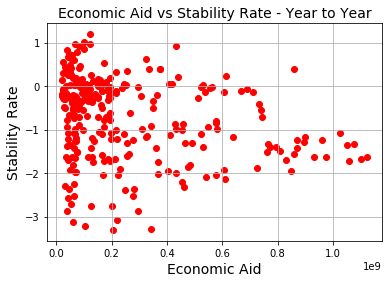

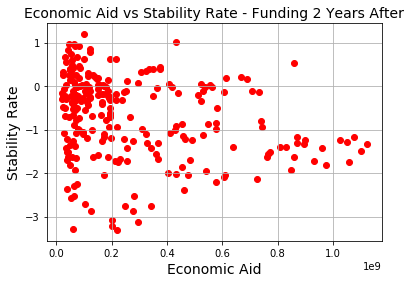

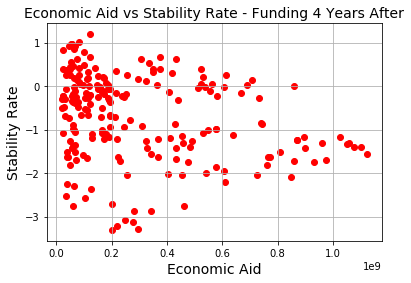

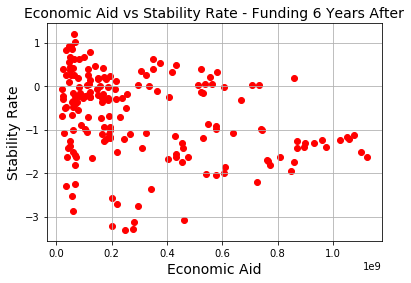

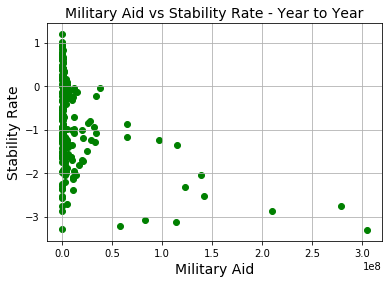

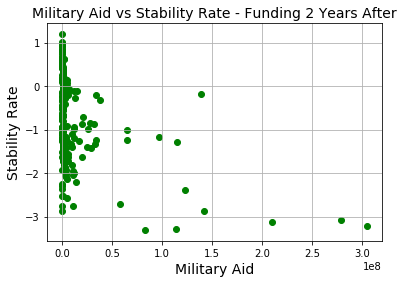

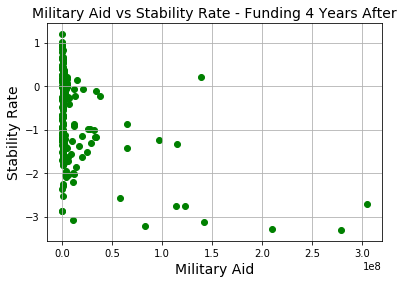

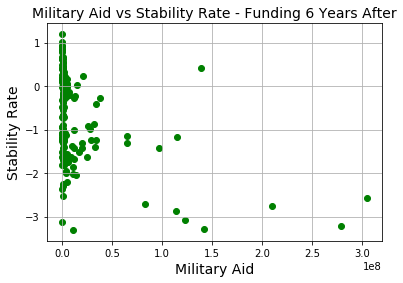

In [30]:
#Scatter Economic vs Stability for Year one Year
plt.scatter(Combined_Aid_Stability['Economic'], Combined_Aid_Stability['Total Stability'], color='red')
plt.title('Economic Aid vs Stability Rate - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 2 years after 
plt.scatter(Combined_Aid_Stability_EM2['Economic_2'], Combined_Aid_Stability_EM2['Total Stability'], color='red')
plt.title('Economic Aid vs Stability Rate - Funding 2 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(Combined_Aid_Stability_EM4['Economic_4'], Combined_Aid_Stability_EM4['Total Stability'], color='red')
plt.title('Economic Aid vs Stability Rate - Funding 4 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(Combined_Aid_Stability_EM6['Economic_6'], Combined_Aid_Stability_EM6['Total Stability'], color='red')
plt.title('Economic Aid vs Stability Rate - Funding 6 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Stability for funding on Year
plt.scatter(Combined_Aid_Stability['Military'], Combined_Aid_Stability['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Stability for funding 2 years after
plt.scatter(Combined_Aid_Stability_EM2['Military_2'], Combined_Aid_Stability_EM2['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 2 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Stability for funding 4 years after
plt.scatter(Combined_Aid_Stability_EM4['Military_4'], Combined_Aid_Stability_EM4['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 4 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Stability for funding 6 years after
plt.scatter(Combined_Aid_Stability_EM6['Military_6'], Combined_Aid_Stability_EM6['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 6 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#while going down on the graphs, there is minor changes on Economic or Milirary Aid showing that Aid is not affected 
#over the next years by the Stability rate

In [31]:
#Moving the data for Stability Rate to 2,4,6 years after the Economic and Military funding was provided. Used the groupby and Shift 
#to bring up Stability data 2, 4 and 6 years. The dropna is to avoid those rows with NA data that will prevent the regression to run.
Combined_Aid_Stability_S2=Combined_Aid_Stability.copy()
Combined_Aid_Stability_S2['Stability_2'] = Combined_Aid_Stability.groupby(['Country'])['Total Stability'].shift(-2)
Combined_Aid_Stability_S2= Combined_Aid_Stability_S2.dropna()

Combined_Aid_Stability_S4=Combined_Aid_Stability.copy()
Combined_Aid_Stability_S4['Stability_4'] = Combined_Aid_Stability.groupby(['Country'])['Total Stability'].shift(-4)
Combined_Aid_Stability_S4= Combined_Aid_Stability_S4.dropna()

Combined_Aid_Stability_S6=Combined_Aid_Stability.copy()
Combined_Aid_Stability_S6['Stability_6'] = Combined_Aid_Stability.groupby(['Country'])['Total Stability'].shift(-6)
Combined_Aid_Stability_S6= Combined_Aid_Stability_S6.dropna()
Combined_Aid_Stability_S6

#the table below is the example for Year 6, moving (shift-6) 6 years up to compare the 2002 data for Economic and Military
#against the 2004, 2006 and 2008 data for Stability rate.

,Country,Year,Economic,Military,Total Aid,Total Stability,Stability_6
0,Angola,2002,1.659227e+08,0.000000e+00,1.659227e+08,-1.577046,-0.362911
1,Angola,2003,2.155944e+08,3.950575e+05,2.159894e+08,-1.006538,-0.347262
2,Angola,2004,1.520490e+08,6.382582e+05,1.526873e+08,-1.062798,-0.226182
3,Angola,2005,8.311513e+07,3.873851e+05,8.350252e+07,-0.887544,-0.369238
4,Angola,2006,9.623060e+07,7.683433e+05,9.699894e+07,-0.541986,-0.389323
5,Angola,2007,6.191552e+07,5.123027e+05,6.242783e+07,-0.666032,-0.391234
6,Angola,2008,6.537215e+07,3.967068e+05,6.576886e+07,-0.362911,-0.333232
7,Angola,2009,6.095525e+07,5.356674e+05,6.149092e+07,-0.347262,-0.500898
8,Angola,2010,1.114652e+08,4.178502e+05,1.118831e+08,-0.226182,-0.315899
9,Angola,2011,8.945588e+07,4.589350e+05,8.991482e+07,-0.369238,-0.294626


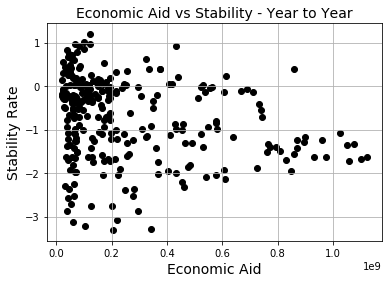

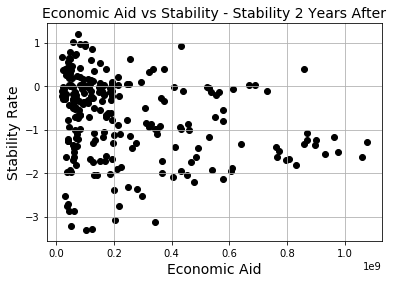

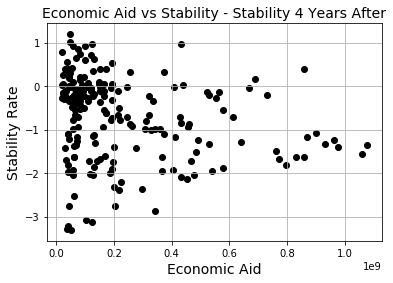

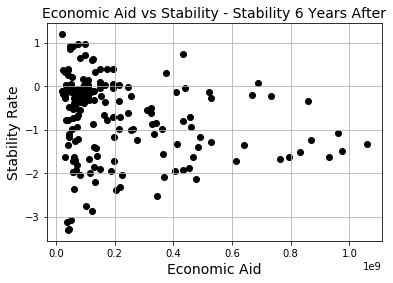

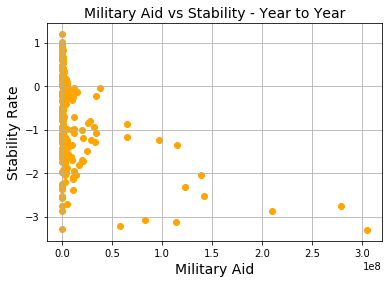

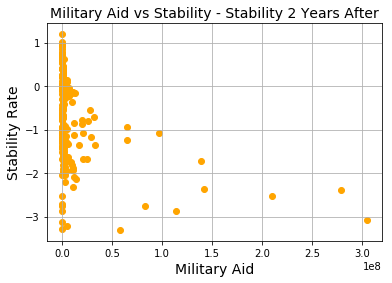

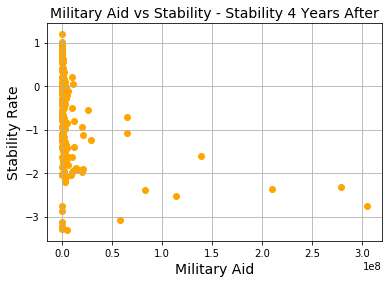

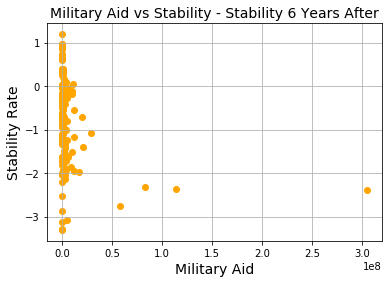

In [32]:
#Scatter Economic vs Stability for Year on Year 
plt.scatter(Combined_Aid_Stability['Economic'], Combined_Aid_Stability['Total Stability'], color='black')
plt.title('Economic Aid vs Stability - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for Stability after 2 Years 
plt.scatter(Combined_Aid_Stability_S2['Economic'], Combined_Aid_Stability_S2['Stability_2'], color='black')
plt.title('Economic Aid vs Stability - Stability 2 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for Stability 4 years after 
plt.scatter(Combined_Aid_Stability_S4['Economic'], Combined_Aid_Stability_S4['Stability_4'], color='black')
plt.title('Economic Aid vs Stability - Stability 4 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for Stability 6 years after 
plt.scatter(Combined_Aid_Stability_S6['Economic'], Combined_Aid_Stability_S6['Stability_6'], color='black')
plt.title('Economic Aid vs Stability - Stability 6 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding on Year
plt.scatter(Combined_Aid_Stability['Military'], Combined_Aid_Stability['Total Stability'], color='orange')
plt.title('Military Aid vs Stability - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 2 years after
plt.scatter(Combined_Aid_Stability_S2['Military'], Combined_Aid_Stability_S2['Stability_2'], color='orange')
plt.title('Military Aid vs Stability - Stability 2 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 4 years after
plt.scatter(Combined_Aid_Stability_S4['Military'], Combined_Aid_Stability_S4['Stability_4'], color='orange')
plt.title('Military Aid vs Stability - Stability 4 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 6 years after
plt.scatter(Combined_Aid_Stability_S6['Military'], Combined_Aid_Stability_S6['Stability_6'], color='orange')
plt.title('Military Aid vs Stability - Stability 6 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()

#if Aid would have a good impact in the Stability rate we would expect to see that the dots go up afte funding was given.
#that is not the case in the graphs shown below.

The next section is running regression to obtain all the statistical data comparing Aid vs Stability and the effect over the years. 

In [33]:
from sklearn import linear_model
X0 = Combined_Aid_Stability[['Economic','Military']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y0 = Combined_Aid_Stability['Total Stability']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X0, Y0)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.41018449918160105
Coefficients: 
 [-7.87914533e-10 -1.02723624e-08]


In [34]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X0) # adding a constant 
model = sm.OLS(Y0, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Total Stability   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     35.36
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.91e-14
Time:                        20:01:18   Log-Likelihood:                -357.43
No. Observations:                 288   AIC:                             720.9
Df Residuals:                     285   BIC:                             731.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4102      0.069     -5.910      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [35]:
#2 Year Regression

X2 = Combined_Aid_Stability_S2[['Economic','Military']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y2 = Combined_Aid_Stability_S2['Stability_2']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.41263820496989856
Coefficients: 
 [-8.48802014e-10 -9.35054015e-09]


In [36]:

# with statsmodels
X = sm.add_constant(X2) # adding a constant 
model = sm.OLS(Y2, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:            Stability_2   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     26.34
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           4.22e-11
Time:                        20:01:25   Log-Likelihood:                -316.12
No. Observations:                 252   AIC:                             638.2
Df Residuals:                     249   BIC:                             648.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4126      0.075     -5.480      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [37]:
#R-squared = 0.175 -An R-squared of 0.175 means that all movements of Stability are 17.5% explained
# by movements in Economic and Military Aid 2 years before

#Stability_2 = (-0.4126) + (8.488e-10)*Economic + (-9.351e-09)*Military
# prediction with sklearn
Military_Funding = 1
Economic_Funding = 0.4
print ('Predicted Stability in 2 years: \n', regr.predict([[Military_Funding, Economic_Funding]]))


Predicted Stability in 2 years: 
 [-0.41263821]


In [38]:
X4 = Combined_Aid_Stability_S4[['Economic','Military']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y4 = Combined_Aid_Stability_S4['Stability_4']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X4, Y4)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.4289527550607889
Coefficients: 
 [-8.46420757e-10 -8.57899491e-09]


In [39]:
# with statsmodels
X = sm.add_constant(X4) # adding a constant 
model = sm.OLS(Y4, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Stability_4   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           2.29e-08
Time:                        20:01:31   Log-Likelihood:                -273.55
No. Observations:                 216   AIC:                             553.1
Df Residuals:                     213   BIC:                             563.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4290      0.081     -5.267      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [40]:
#R-squared = 0.152 -An R-squared of 0.152 means that all movements of Stability are 15.2% explained
# by movements in Economic and Military Aid 4 years before

#Stability_4 = (-0.4290) + (-8.464e-10)*Economic + (-8.579e-09)*Military
# prediction with sklearn
Military_Funding = 1
Economic_Funding = 0.4
print ('Predicted Stability in 4 years: \n', regr.predict([[Military_Funding, Economic_Funding]]))

Predicted Stability in 4 years: 
 [-0.42895276]


In [41]:
X6 = Combined_Aid_Stability_S6[['Economic','Military']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Economiv'] for example. Alternatively, you may add additional variables within the brackets
Y6 = Combined_Aid_Stability_S6['Stability_6']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X6, Y6)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.48584775520369394
Coefficients: 
 [-8.49278459e-10 -8.84327716e-09]


In [42]:
# with statsmodels

X = sm.add_constant(X6) # adding a constant 
model = sm.OLS(Y6, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            Stability_6   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     10.13
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           6.86e-05
Time:                        20:01:39   Log-Likelihood:                -230.50
No. Observations:                 180   AIC:                             467.0
Df Residuals:                     177   BIC:                             476.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4858      0.090     -5.392      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [43]:
#R-squared = 0.001 -An R-squared of 0.001 means that all movements of Stability are 0.1% explained
#by movements in Economic and Military Aid 6 years before

#Stability_6 = (-0.4858) + (-8.493e-10)*Economic + (-8.843e-09)*Military
# prediction with sklearn
Military_Funding = 1
Economic_Funding = 0.4
print ('Predicted Stability in 6 years: \n', regr.predict([[Military_Funding, Economic_Funding]]))

Predicted Stability in 6 years: 
 [-0.48584776]


In [44]:
#getting rid of Military, Economic Aid and year to see which 5 countries received more funding in the sample
Summary_Aid_Stability = Combined_Aid_Stability.drop(columns=['Economic', 'Military', 'Year', 'Total Stability'])
Summary_Aid_Stability.head(10)


,Country,Total Aid
0,Angola,1.659227e+08
1,Angola,2.159894e+08
2,Angola,1.526873e+08
3,Angola,8.350252e+07
4,Angola,9.699894e+07
5,Angola,6.242783e+07
6,Angola,6.576886e+07
7,Angola,6.149092e+07
8,Angola,1.118831e+08
9,Angola,8.991482e+07


In [45]:
#grouping by country to find out which countries recieved more and less aid
Summary_Aid_Stability_df = Summary_Aid_Stability.groupby('Country')[['Total Aid']].sum()
Summary_Aid_Stability_df.head(10)

,Total Aid
Country,
Angola,1.506143e+09
Benin,1.426953e+09
Burundi,9.177332e+08
Ethiopia,1.237565e+10
Ghana,3.375036e+09
Kenya,1.087626e+10
Madagascar,1.341919e+09
Mali,2.819429e+09
Mozambique,5.254134e+09


In [46]:
#sorting from high to low aid 
Summary_Aid_Stability_df.sort_values(by=['Total Aid'], ascending=False)

,Total Aid
Country,
Ethiopia,1.237565e+10
Kenya,1.087626e+10
Uganda,7.154487e+09
Nigeria,6.914687e+09
South Africa,6.637084e+09
Mozambique,5.254134e+09
Somalia,4.318955e+09
Ghana,3.375036e+09
Mali,2.819429e+09


In [47]:
#Filering the top 5 countries who got more Aid

select_top_country_df = Combined_Aid_Stability.loc[(Combined_Aid_Stability['Country']=="Ethiopia")|
(Combined_Aid_Stability['Country']=="Kenya")|(Combined_Aid_Stability['Country']=="Uganda")|
(Combined_Aid_Stability['Country']=="Nigeria")|
(Combined_Aid_Stability['Country']=="South Africa"),:]
select_top_country_df.head(10)

,Country,Year,Economic,Military,Total Aid,Total Stability
48,Ethiopia,2002,1.960068e+08,4.326029e+06,2.003328e+08,-1.223214
49,Ethiopia,2003,7.954112e+08,5.880078e+06,8.012913e+08,-1.408554
50,Ethiopia,2004,4.656714e+08,3.856356e+06,4.695278e+08,-1.311482
51,Ethiopia,2005,8.314030e+08,9.433383e+06,8.408363e+08,-1.690749
52,Ethiopia,2006,3.656896e+08,3.084161e+06,3.687738e+08,-1.738937
53,Ethiopia,2007,4.843003e+08,2.768068e+06,4.870683e+08,-1.803412
54,Ethiopia,2008,1.058734e+09,1.613122e+06,1.060347e+09,-1.730085
55,Ethiopia,2009,9.753596e+08,1.658987e+06,9.770186e+08,-1.640794
56,Ethiopia,2010,9.318225e+08,3.764013e+05,9.321989e+08,-1.635101
57,Ethiopia,2011,7.625845e+08,7.289721e+05,7.633135e+08,-1.506964


In [48]:
#Filering the top 5 countries who got more Aid

select_low_country_df = Combined_Aid_Stability.loc[(Combined_Aid_Stability['Country']=="Sierra Leone")|
(Combined_Aid_Stability['Country']=="Burundi")|(Combined_Aid_Stability['Country']=="Madagascar")|
(Combined_Aid_Stability['Country']=="Benin")|
(Combined_Aid_Stability['Country']=="Namibia"),:]
select_low_country_df.head(10)

,Country,Year,Economic,Military,Total Aid,Total Stability
16,Benin,2002,3.878304e+07,669234.634894,3.945227e+07,0.820294
17,Benin,2003,4.141855e+07,499708.531080,4.191826e+07,0.679064
18,Benin,2004,4.025426e+07,0.000000,4.025426e+07,0.265107
19,Benin,2005,3.020562e+07,0.000000,3.020562e+07,0.446816
20,Benin,2006,2.284744e+07,413538.926602,2.326098e+07,0.547010
21,Benin,2007,3.744548e+08,445785.006196,3.749006e+08,0.386123
22,Benin,2008,3.501206e+07,166914.112291,3.517898e+07,0.374591
23,Benin,2009,4.779450e+07,481422.600000,4.827592e+07,0.403298
24,Benin,2010,5.123644e+07,353996.431404,5.159044e+07,0.261260
25,Benin,2011,4.924125e+07,698842.728942,4.994010e+07,0.318356


In [51]:
select_top_country_df.iplot(kind='bubble', x='Year', y='Total Stability', size='Total Aid', text='Country', 
                            title='Top 5 countries who receive More Aid', xTitle='Year', yTitle='Stability Index', 
                            mode='markers', filename='Aid_vs_Stability_bubbleplot') 
marker=dict(color = select_top_country_df['Country'][750:1500], colorscale = 'Viridis', colorbar = dict(title = 'Countries'), line=dict(color='rgb(140, 140, 170)'))

# you can find the edited plot  - https://plot.ly/~richongo/10/

In [61]:
#Creating a Scatter bubble graph comparing Aid vs Stability by year using the following variables:
#x_axis = Year
#y = stability
#x1 = Total Aid # size of the bubble

#pip install cufflinks in GitBash

select_low_country_df.iplot(kind='bubble', x='Year', mode='markers', y='Total Stability', size='Total Aid', text='Country',
             title='Bottom 5 countries who receive less Aid', xTitle='Year', yTitle='Stability Index',
             filename='Aid_vs_Stability_bubbleplot')


#edited graph found at  - https://plot.ly/~richongo/10/



In [53]:
select_low_country_df.iplot(kind='bubble', x='Year', mode='markers', y='Total Stability', size='Total Aid', text='Country',
             title='Bottom 5 countries who receive less Aid', xTitle='Year', yTitle='Stability Index',
             filename='Aid_vs_Stability_bubbleplot')

Text(0, 0.5, 'Aid Received')

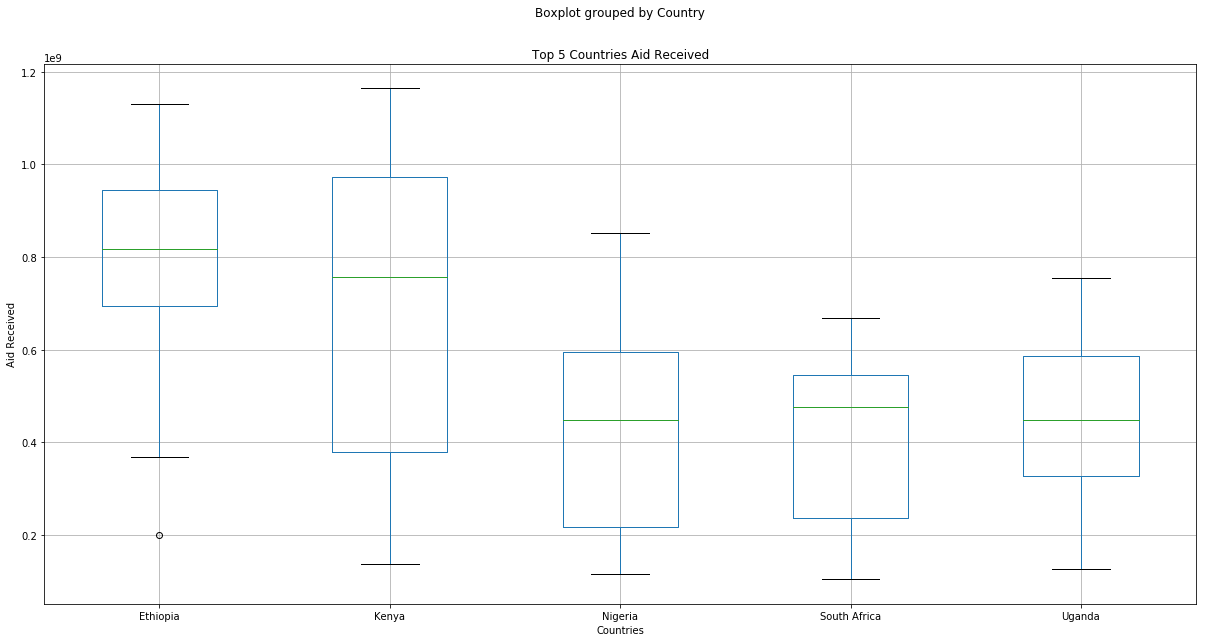

In [54]:
import scipy.stats as stats
# Create a boxplot to compare means between selected top countries
select_top_country_df.boxplot("Total Aid", by="Country", figsize=(20, 10))
plt.title('Top 5 Countries Aid Received')
plt.xlabel('Countries')
plt.ylabel('Aid Received')


Text(0, 0.5, 'Aid Received')

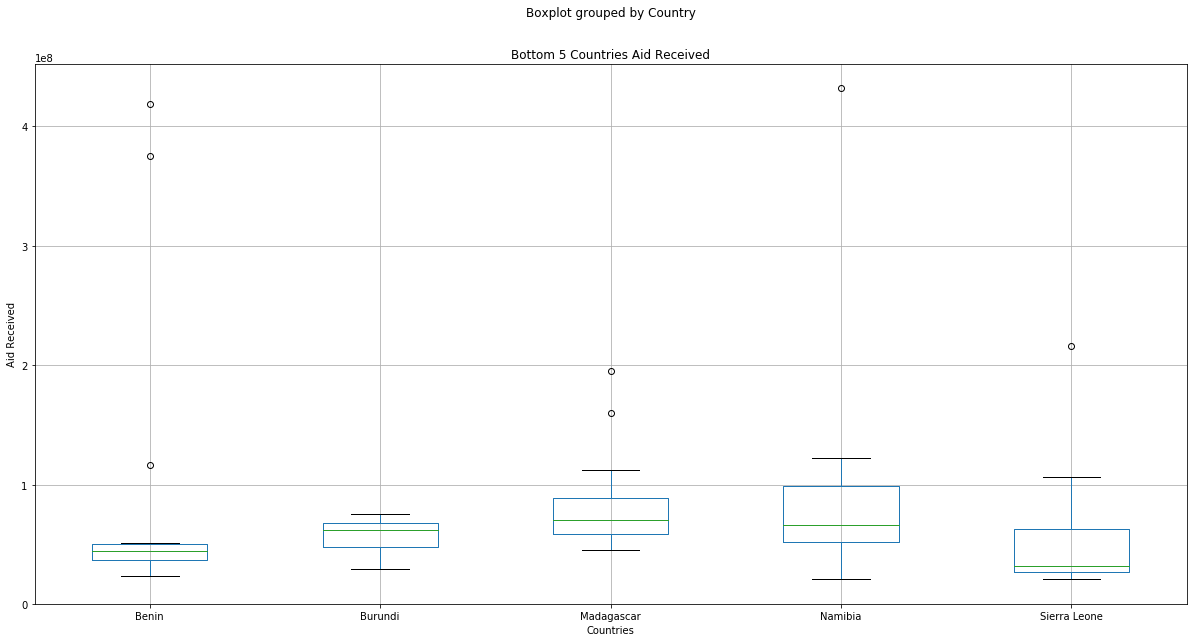

In [55]:
# Create a boxplot to compare means between selected low countries
select_low_country_df.boxplot("Total Aid", by="Country", figsize=(20, 10))
plt.title('Bottom 5 Countries Aid Received')
plt.xlabel('Countries')
plt.ylabel('Aid Received')


(-2.5, 2.0)

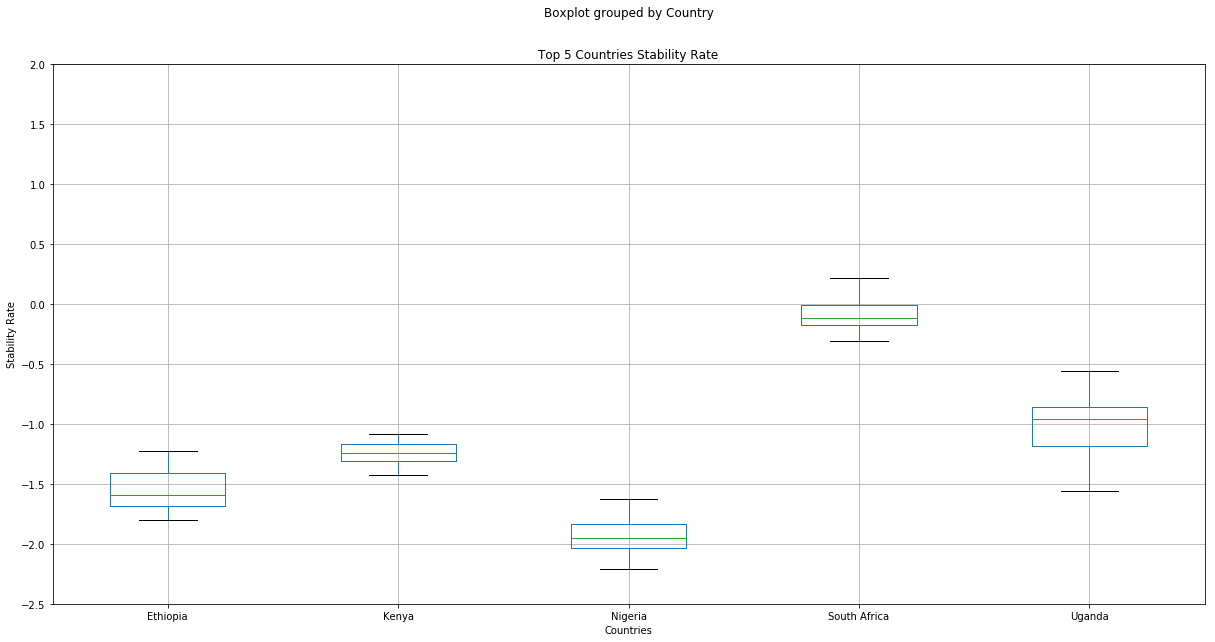

In [56]:
# Create a boxplot to compare means between selected top countries
select_top_country_df.boxplot("Total Stability", by="Country", figsize=(20, 10))
plt.title('Top 5 Countries Stability Rate')
plt.xlabel('Countries')
plt.ylabel('Stability Rate')
plt.ylim(-2.5,2.0)


(-2.5, 2.0)

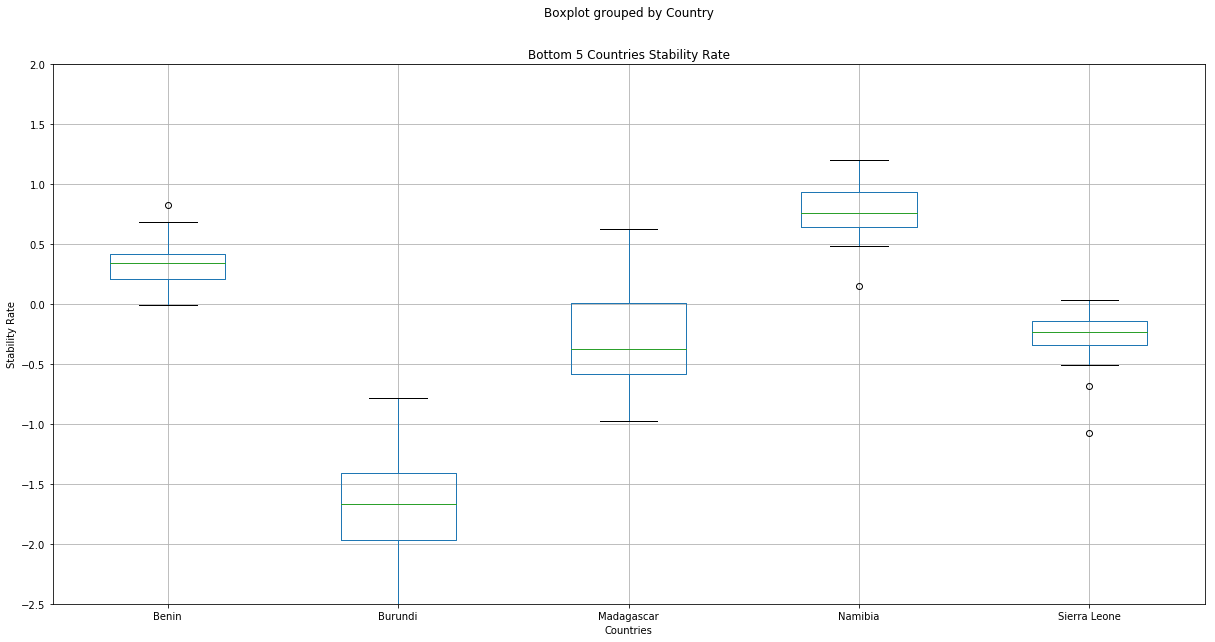

In [57]:
# Create a boxplot to compare means between selected low countries
select_low_country_df.boxplot("Total Stability", by="Country", figsize=(20, 10))
plt.title('Bottom 5 Countries Stability Rate')
plt.xlabel('Countries')
plt.ylabel('Stability Rate')
plt.ylim(-2.5,2.0)